# Assignment #5: cs201 Mock Exam寒露第三天

Updated 1913 GMT+8 Oct 10, 2025

2025 fall, Complied by <mark>胡孝齐 物理学院</mark>





>**说明：**
>
>1. **解题与记录：**
>
>     对于每一个题目，请提供其解题思路（可选），并附上使用Python或C++编写的源代码（确保已在OpenJudge， Codeforces，LeetCode等平台上获得Accepted）。请将这些信息连同显示“Accepted”的截图一起填写到下方的作业模板中。（推荐使用Typora https://typoraio.cn 进行编辑，当然你也可以选择Word。）无论题目是否已通过，请标明每个题目大致花费的时间。
>
>2. **提交安排：**提交时，请首先上传PDF格式的文件，并将.md或.doc格式的文件作为附件上传至右侧的“作业评论”区。确保你的Canvas账户有一个清晰可见的本人头像，提交的文件为PDF格式，并且“作业评论”区包含上传的.md或.doc附件。
> 
>3. **延迟提交：**如果你预计无法在截止日期前提交作业，请提前告知具体原因。这有助于我们了解情况并可能为你提供适当的延期或其他帮助。  
>
>请按照上述指导认真准备和提交作业，以保证顺利完成课程要求。



## 1. 题目

### E29952: 咒语序列

Stack, http://cs101.openjudge.cn/practice/29952/

思路：
由于只有一种括号，可以使用计数器替代栈来判断是否和谐，然后使用列表记录最后一个不和谐的咒语索引。


代码：

```python
s=input()
i=0
l=[-1]
c=0
m=0
while i<len(s):
    if s[i]=='(':
        c+=1
        l.append(i)
    else:
        if c>0:
            c-=1
            l.pop()
            m=max(m,i-l[-1])
        else:
            l=[i]
            c=0
    i+=1
print(m)
```



代码运行截图 <mark>（至少包含有"Accepted"）</mark>
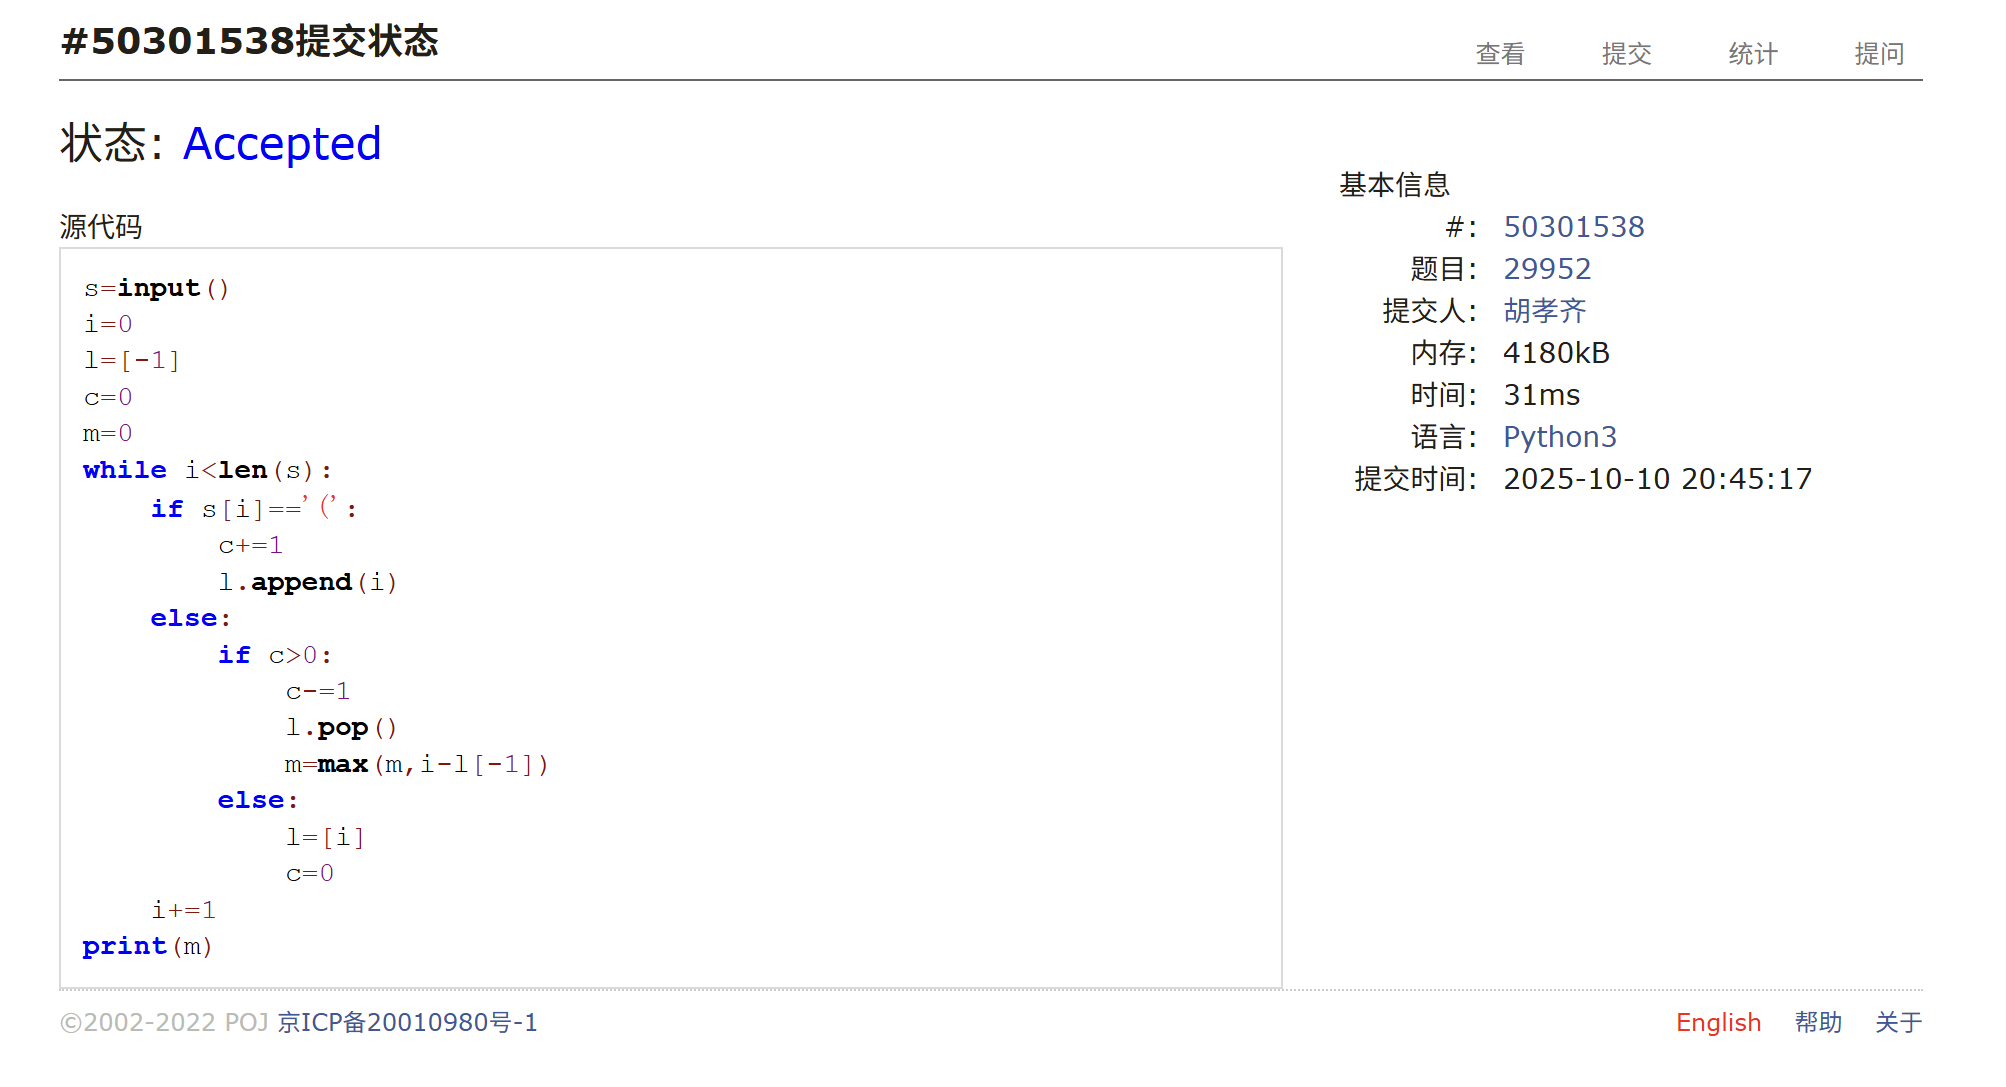




### M01328: Radar Installation

greedy, http://cs101.openjudge.cn/practice/01328/


思路：
贪心，算法思路类似并集，都是先对上界或下界排序然后比较，输出时不要遗漏Case:


代码：

```python
c=0
while True:
    c+=1
    n,d=map(int,input().strip().split())
    if n==0 and d==0:
        break
    l=[]
    judge=0
    for _ in range(n):
        x,y=map(int,input().strip().split())
        if y>d:
            judge=1
        dx=(d**2-y**2)**0.5
        l.append([x-dx,x+dx])

    if judge:
        print(f'Case {c}: -1')
        input()
        continue
    l.sort(key=lambda x:x[1])
    p=l[0][1]
    count=1
    for i in range(1,n):
        if l[i][0]>p:
            p=l[i][1]
            count+=1
    print(f'Case {c}: {count}')
    input()
```



代码运行截图 <mark>（至少包含有"Accepted"）</mark>
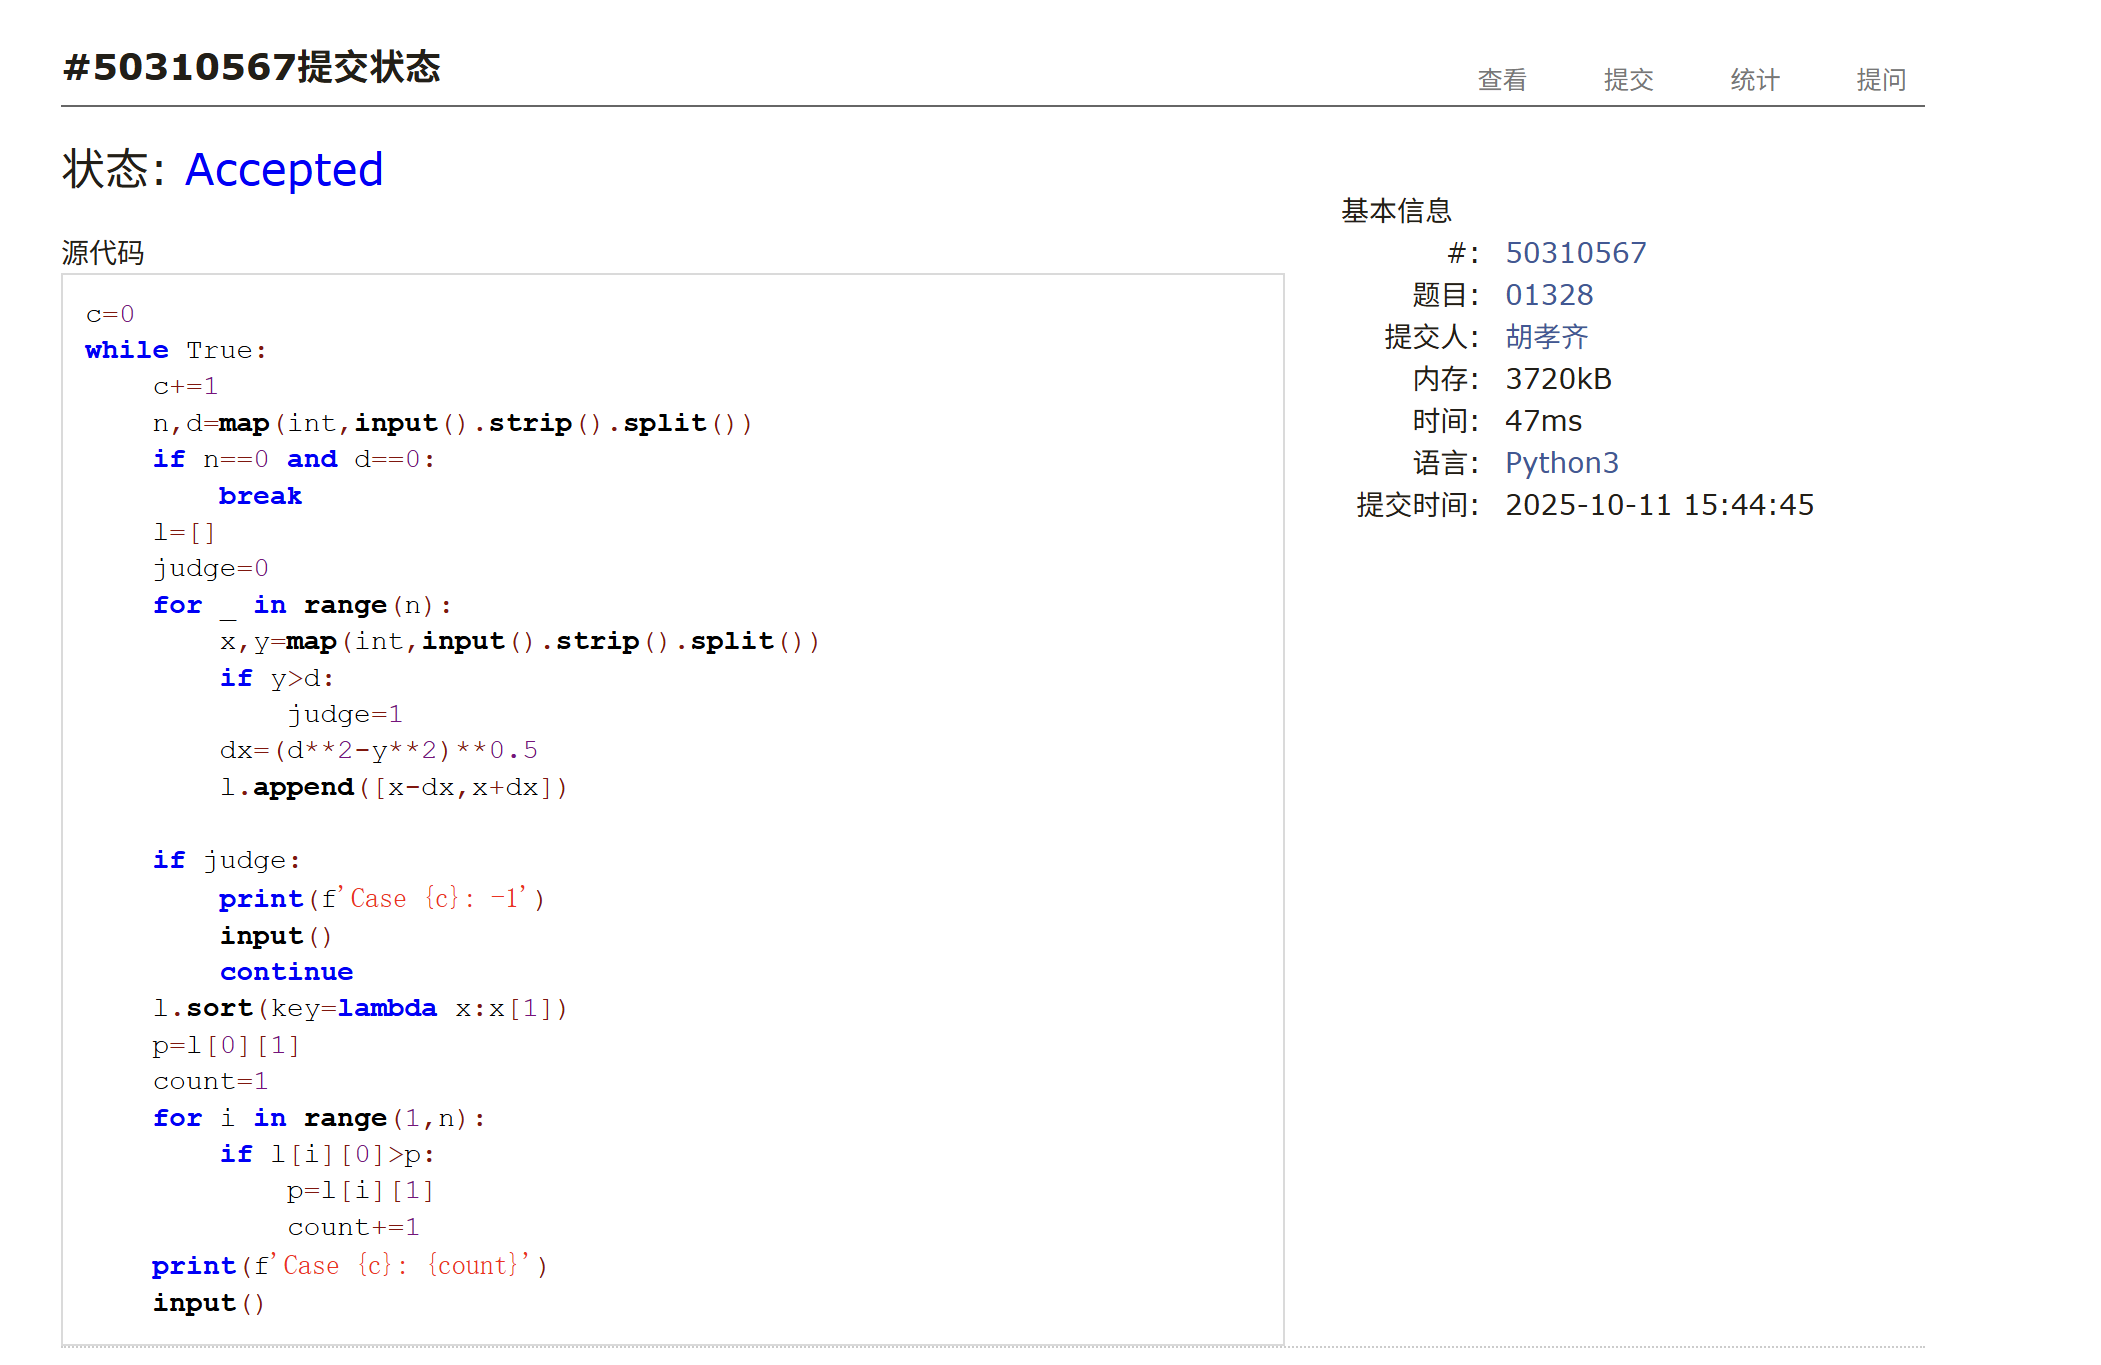




### M02754: 八皇后

dfs, http://cs101.openjudge.cn/practice/02754/

思路：
双层的列表注意要深拷贝！


代码：

```python
import copy
def dfs(i,s,l):
    if i==8:
        ans.append(s)
        return
    for j in range(8):
        if l[i][j]:
            lj=copy.deepcopy(l)
            k=i+1
            while k<8:
                lj[k][j]=False
                if k-i+j<8:
                    lj[k][k-i+j]=False
                if j-(k-i)>=0:
                    lj[k][j-k+i]=False
                k+=1
            dfs(i+1,s+str(j+1),lj)
ans=[]
l=[[True]*8 for _ in range(8)]
dfs(0,'',l)
n=int(input())
for _ in range(n):
    num=int(input())
    print(ans[num-1])
```



代码运行截图 <mark>（至少包含有"Accepted"）</mark>
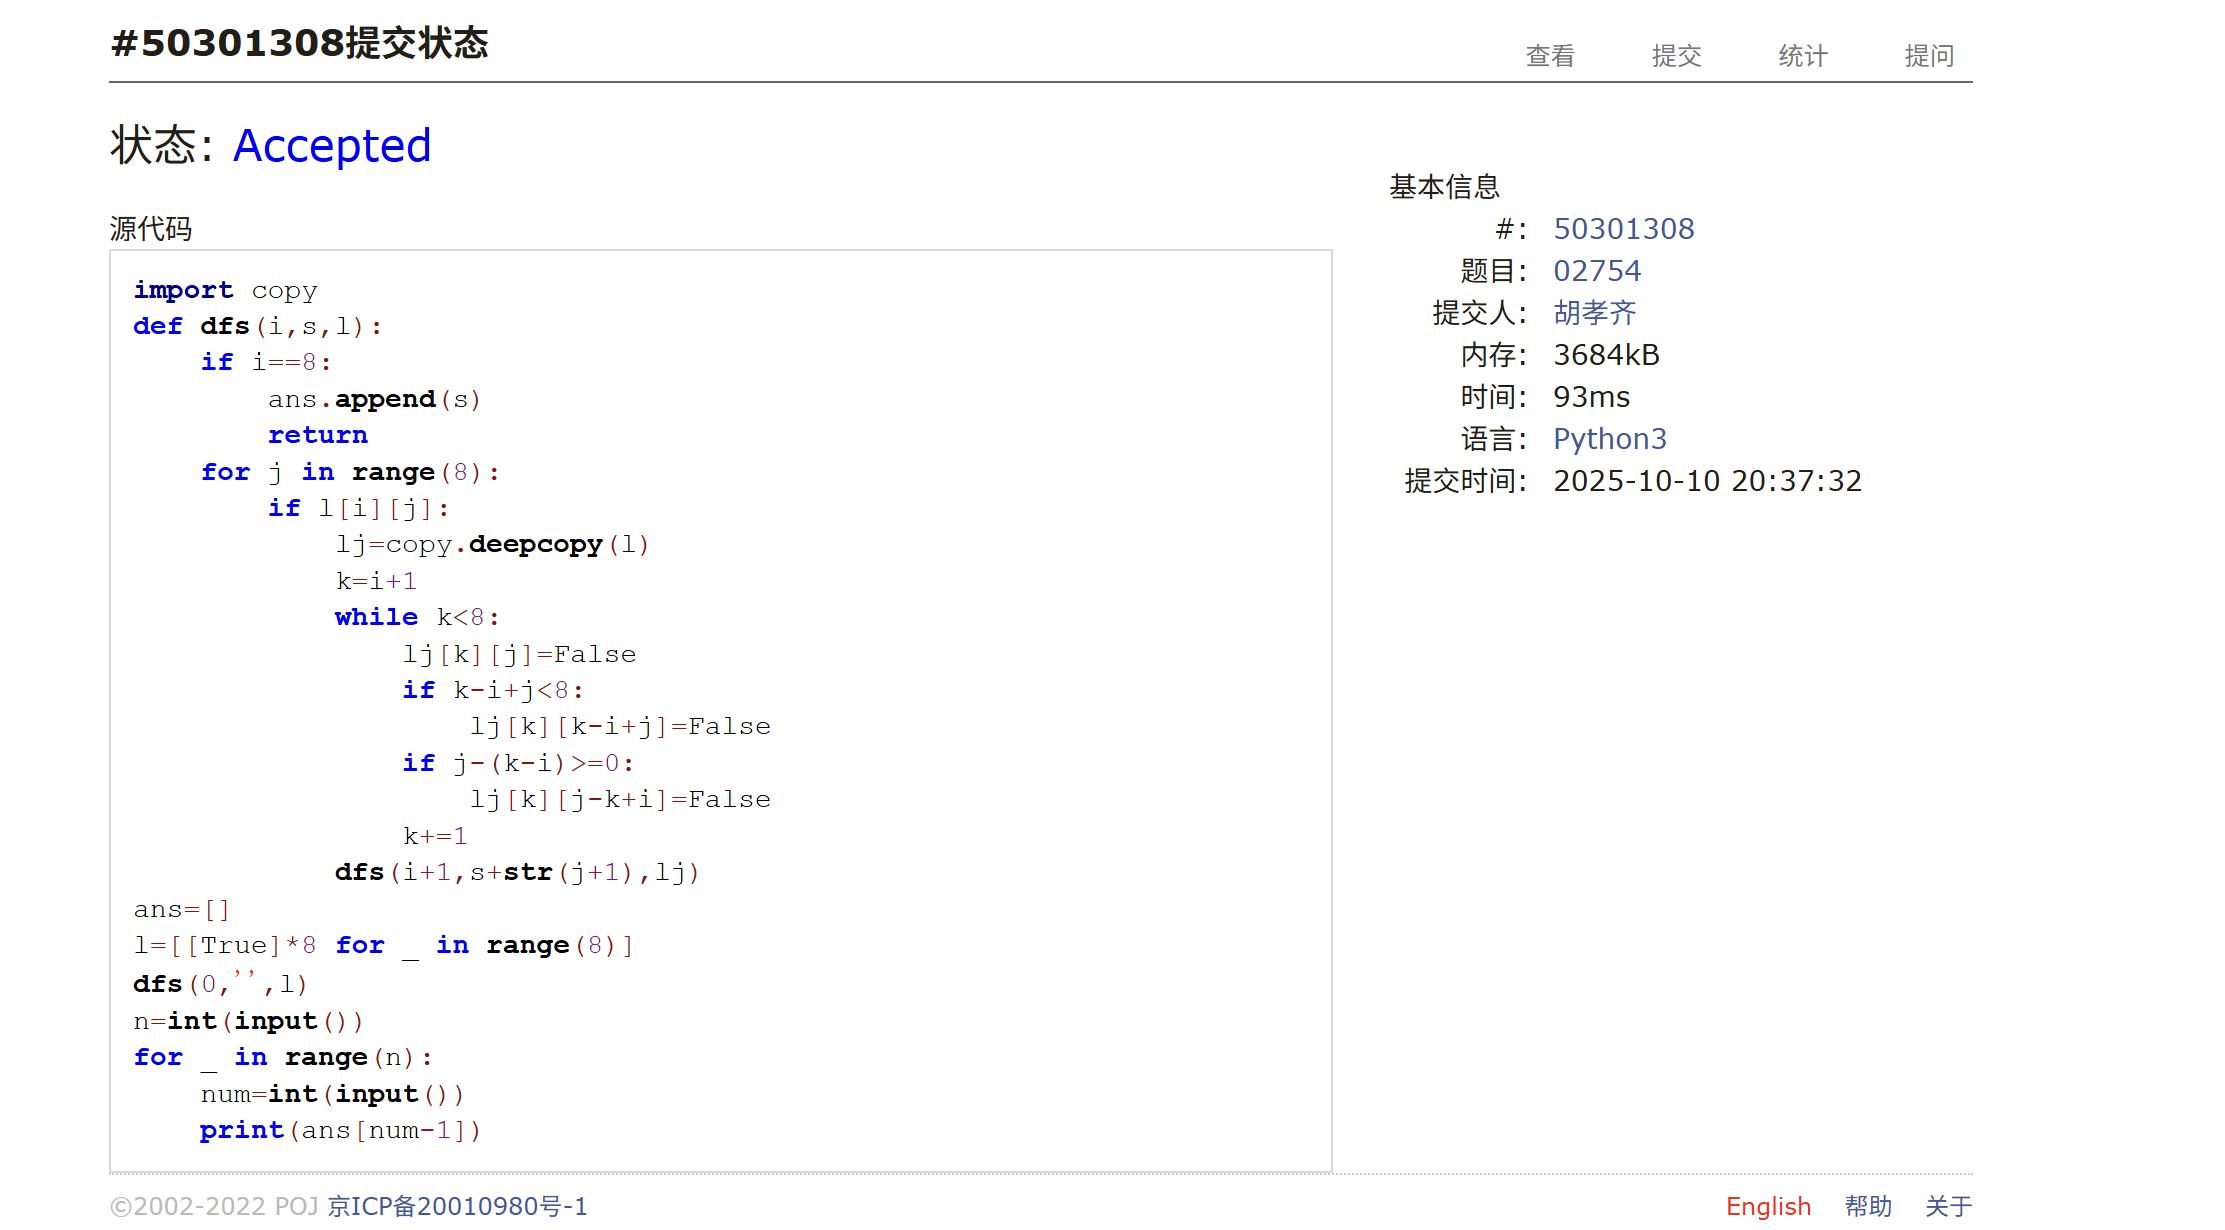




### M25570: 洋葱

matrices, http://cs101.openjudge.cn/practice/25570/

思路：



代码：

```python
def f(l,n):
    s=0
    if n==0:
        return 0
    if n==1:
        return l[0][0]
    for i in range(n):
        s+=l[0][i]+l[-1][i]
    for i in range(1,n-1):
        s+=l[i][0]+l[i][-1]
    del l[-1]
    del l[0]
    for i in range(n-2):
        del l[i][0]
        del l[i][-1]
    return max(s,f(l,n-2))
n=int(input().strip())
l=[]
for _ in range(n):
    li=list(map(int,input().strip().split()))
    l.append(li)
print(f(l,n))
```



代码运行截图 <mark>（至少包含有"Accepted"）</mark>
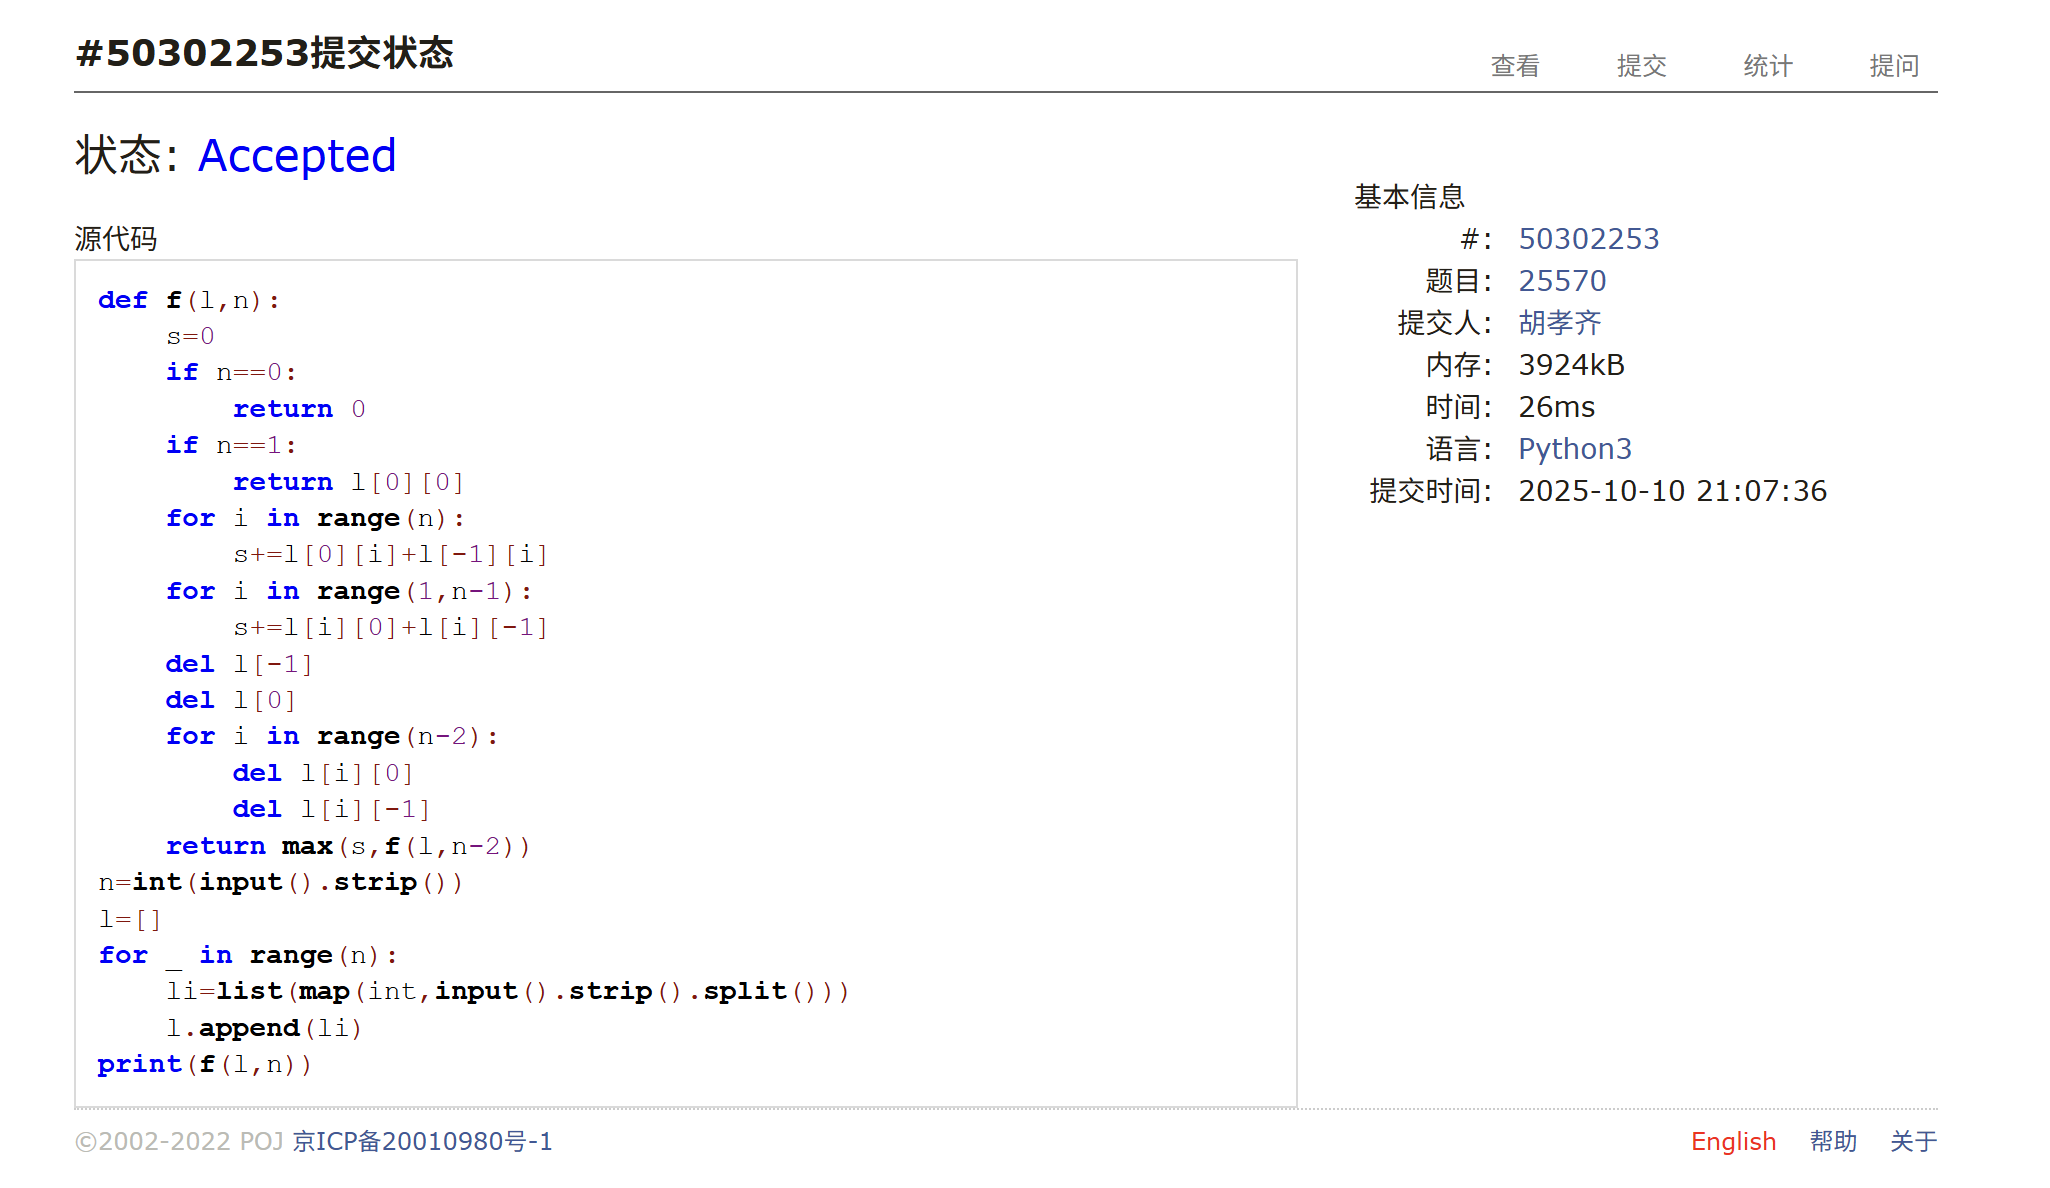






### M29954: 逃离紫罗兰监狱

bfs, http://cs101.openjudge.cn/practice/29954/

思路：
采用bfs，记录最小次数，仅将更少步数状态的加入待访问队列中


代码

```python
from collections import deque
R,C,K=map(int,input().strip().split())
l=[]
for i in range(R):
    li=input().strip()
    for j in range(C):
        if li[j]=='S':
            rs,cs=i,j
    l.append(li)
min_history=[[[float('inf')]*(K+1) for _ in range(C)]for __ in range(R)]
min_history[rs][cs][0]=0
ans=float('inf')
q=deque()
q.append((rs,cs,0))

while q:
    r,c,k=q.popleft()
    n=min_history[r][c][k]
    if l[r][c]=='E':
        ans=min(ans,n)

    next_steps=[(r+1,c),(r,c+1),(r-1,c),(r,c-1)]
    for nr,nc in next_steps:
        if 0<=nr<R and 0<=nc<C:      
            nk=k
            if l[nr][nc]=='#':
                nk+=1
            if nk>K:
                continue
            if min_history[nr][nc][nk]>n+1:
                min_history[nr][nc][nk]=n+1
                q.append((nr,nc,nk))
            
if ans==float('inf'):
    print(-1)
else:
    print(ans)

```



<mark>（至少包含有"Accepted"）</mark>
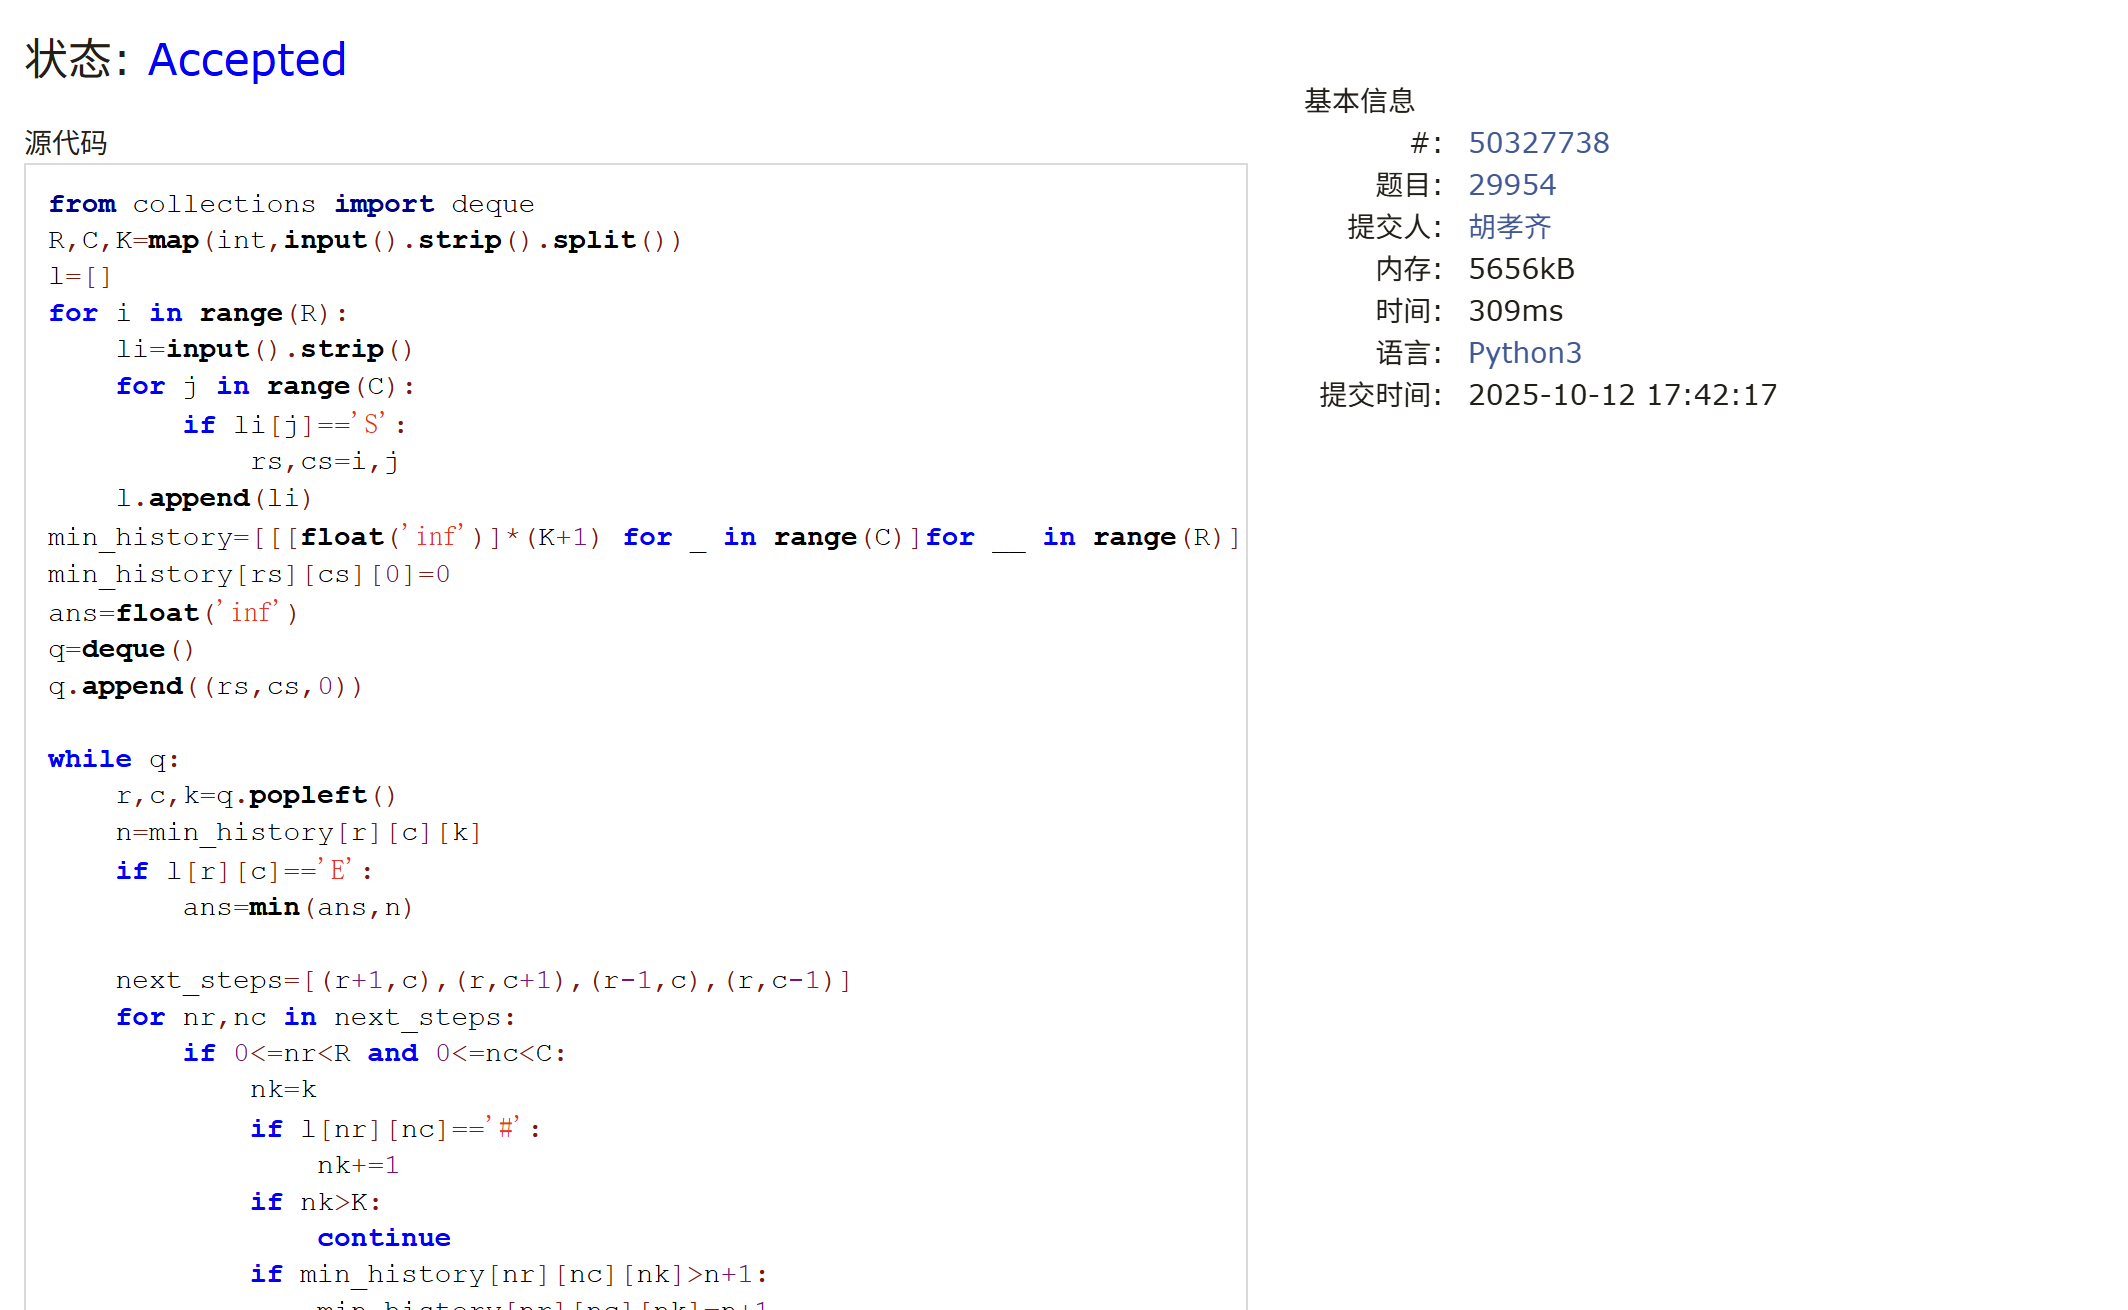




### T27256: 当前队列中位数

backtracking, http://cs101.openjudge.cn/practice/27256/

思路：
使用两个堆分别储存大的一半数和小的一半数，添加新元素时为保证加入合适的位置，一种方法是先将要加入的数放入另一个堆，然后将堆顶移动至需要增加长度的堆，如此可保证不放错位置，更加直观明了的方式就是直接与堆顶进行比较，就知道该加入哪个堆了（就是我在del操作维护a,b时的方式）
删除元素比较难办，采用缓删除，将需要删除的元素记录在字典中，但我们并不知晓其在堆中具体的索引，我的方法是使用a,b记录堆A,B的实际长度（假设删除已经完成），实际上则仅删除位于堆顶的待删除元素，然后定义clean函数清理堆顶待删除元素，在平衡两个堆的长度时，直接使用a,b来判定，这样的话就达成了与删除等同的效果，既不影响堆顶的读取，也不影响长度的平衡。


代码

```python
from collections import deque
from collections import defaultdict
from heapq import *
n=int(input().strip())
dq=deque()
A=[]
B=[]
to_del=defaultdict(int)
a=0
b=0

def balance():
    global a,b
    clean()
    if a==b+1:
        heappush(B,-heappop(A))
        a-=1
        b+=1
    if b==a+2:
        heappush(A,-heappop(B))
        b-=1
        a+=1
    clean()


def clean():
    while B and B[0] in to_del:
        to_del[B[0]]-=1
        if to_del[B[0]]==0:
            del to_del[B[0]]
        heappop(B)
    while A and -A[0] in to_del:
        to_del[-A[0]]-=1
        if to_del[-A[0]]==0:
            del to_del[-A[0]]
        heappop(A)

for _ in range(n):
    operation=input().strip()

    if operation=='del':
        num_to_del=dq.popleft()
        to_del[num_to_del]+=1
        if num_to_del>=B[0]:
            b-=1
        else:
            a-=1
        balance()

    elif operation=='query':
        if b>a:
            print(B[0])
        else:
            m=(B[0]-A[0])/2
            print(int(m) if m.is_integer() else f'{m:.1f}')

    else:
        num=int(operation[4:])
        dq.append(num)
        if b>a:
            heappush(B,num)
            heappush(A,-heappop(B))
            a+=1
        else:
            heappush(A,-num)
            heappush(B,-heappop(A))
            b+=1
        clean()
```



<mark>（至少包含有"Accepted"）</mark>
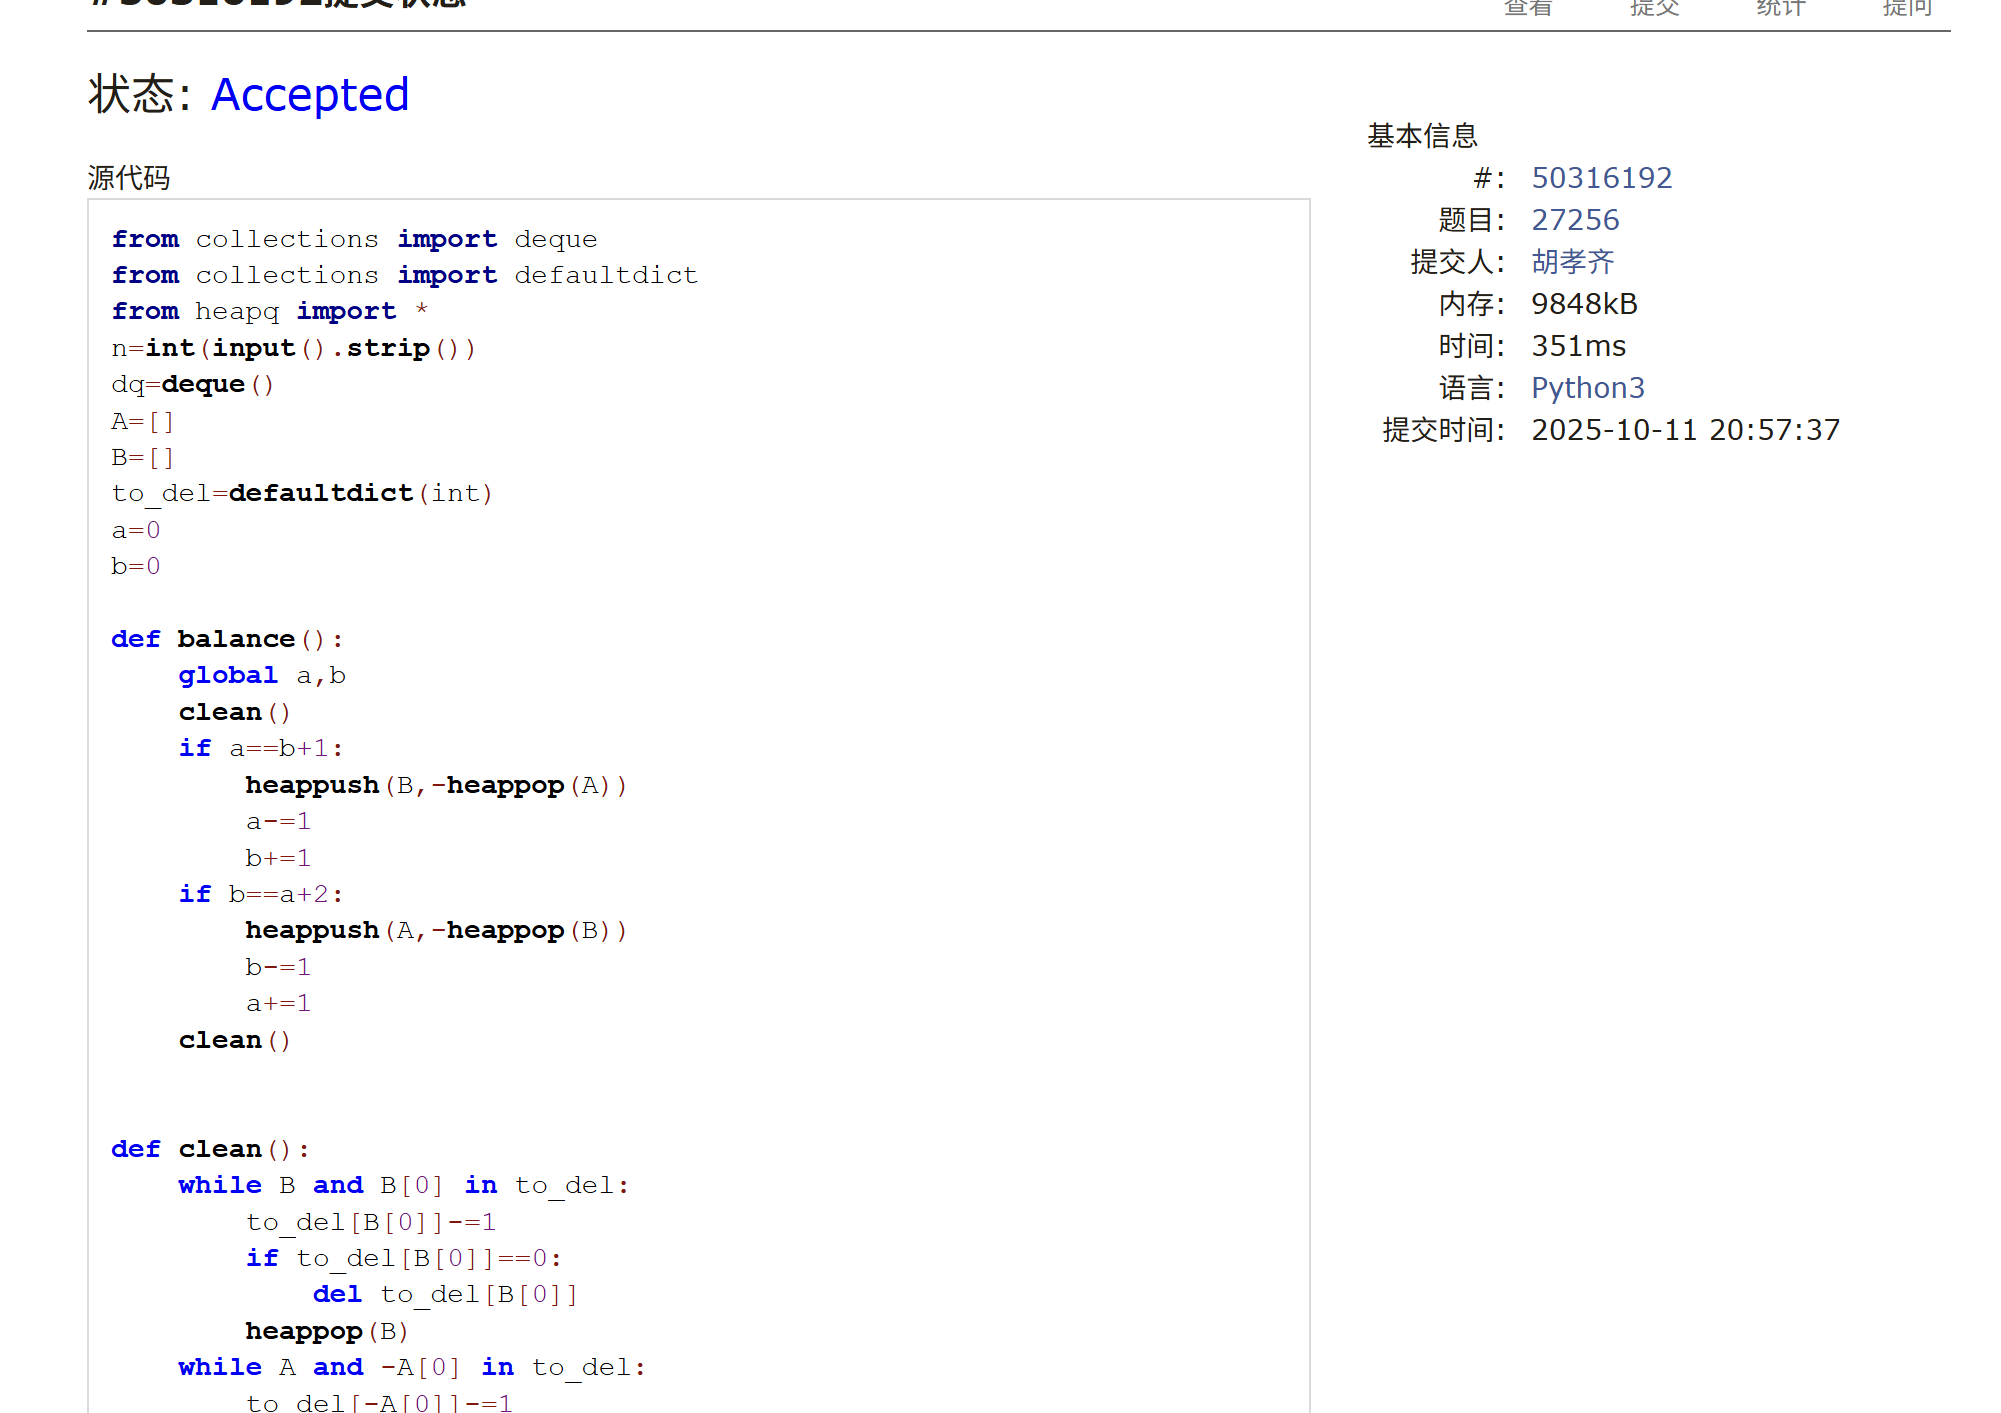




## 2. 学习总结和个人收获

月考时只ac两题，第一题一开始思路过于麻烦，wa次数过多，耗费了大量时间，第二题贪心没想到可以使用与合并区间类似的思路，八皇后回溯算法写对了，但是双层列表没有深拷贝，本质上是不知道需要深拷贝。